# Retail analysis

### Provided with a set of detailed historical sales data, can we accurately predict next years' sales? This is a nontrivial problem involving regression, time series, and causal inference

### The datasets

We are provided with three datasets spanning roughly a three year range between 2010-2013 for 45 unique stores. The datasets are:

1. Features, 2. Sales, 3. Stores

## Preliminary data analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt

datapath='/Users/lydiaelias/Documents/retaildata/'

features = pd.read_csv(datapath+'Features data set.csv')
stores = pd.read_csv(datapath+'stores data-set.csv')
sales = pd.read_csv(datapath+'sales data-set.csv')

In [2]:
features.info()
stores.info()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non

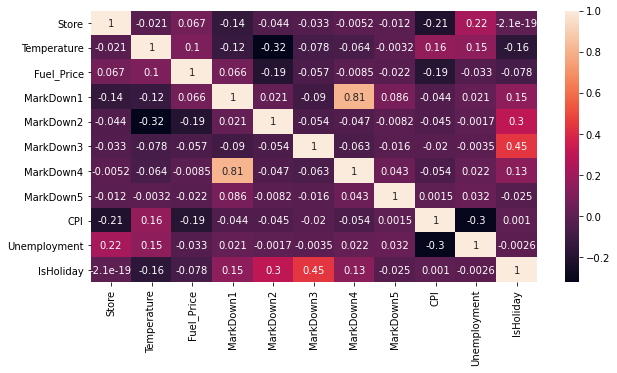

In [3]:
import seaborn as sns
fig,ax=plt.subplots(1,figsize=(10,5))
ax=sns.heatmap(features.corr(),annot=True)

Some correlations are expected: for example, markdowns correspond with holidays and CPI corresponds (negatively) with Unemployment. However, others are more unexpected, e.g Markdowns 1 and 4 are highly correlated as are Temperature and Markdown 2

It appears that the CPI and Unemployment columns of the features dataframe are incomplete. Let's investigate.

#### CPI and Unemployment analysis

In [4]:
#I have a hunch this missing data may be related to date. Let's break down datetimes into year, month, and day
features['Date'] = pd.to_datetime(features['Date'],dayfirst=True)

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.star

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.star

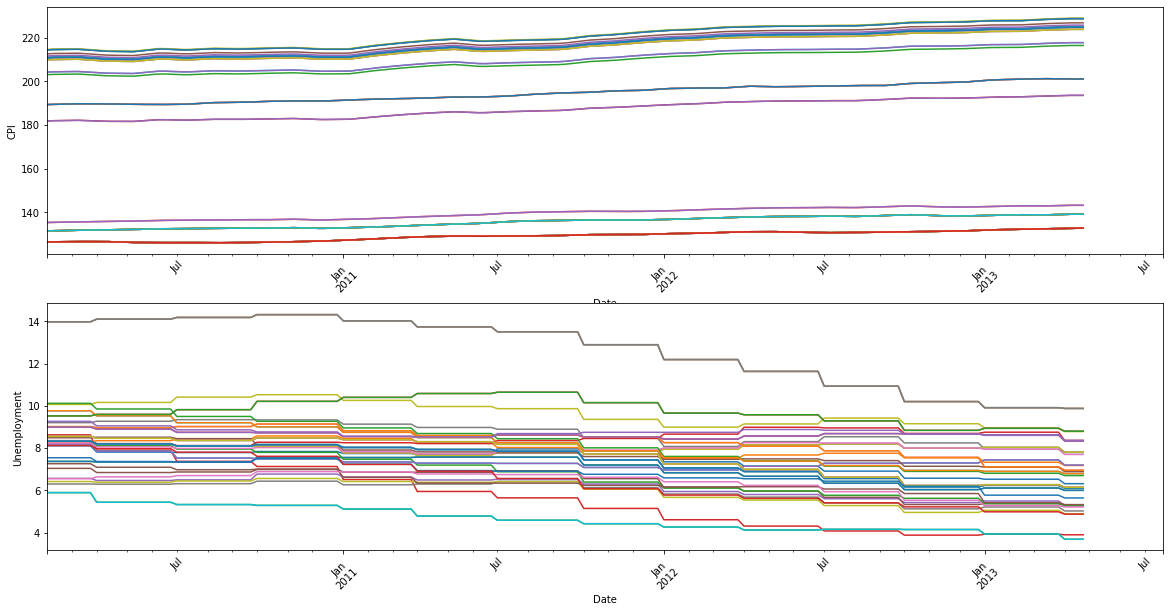

In [5]:
fig,ax=plt.subplots(2,1,figsize=(20,10))#,sharex=True)
features.groupby("Store").plot(kind="line", x="Date", y="CPI", rot=45, ax=ax[0], legend=False)
features.groupby("Store").plot(kind="line", x="Date", y="Unemployment", rot=45, ax=ax[1], legend=False)
ax[1].set_xlabel('Date')
#ax[1].set_xticks(features['Month'])
ax[0].set_ylabel('CPI')
ax[1].set_ylabel('Unemployment')
plt.show()

So until March, 2013 we have complete data, but after that we are missing CPI and Unemployment values. Luckily, it seems like there are not too many missing values and we can impute them later. 

#### Store type analysis

In [6]:
print(stores[:30])
#Confirm that this number is the length of the column
#print(len(stores.loc[stores['Type']=='A'])+len(stores.loc[stores['Type']=='B'])+len(stores.loc[stores['Type']=='C']))

    Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988


So store types are either A, B, or C

Let's try to see how these types of stores affect sales

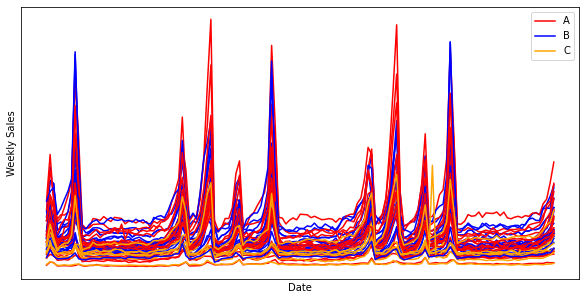

In [7]:
A_stores=stores['Store'][stores['Type']=='A']
B_stores=stores['Store'][stores['Type']=='B']
C_stores=stores['Store'][stores['Type']=='C']

dept_num=1

fig,ax=plt.subplots(1,figsize=(10,5))

for i in range(1,45):
    if i in A_stores:
        c='red'
    elif i in B_stores:
        c='blue'
    elif i in C_stores:
        c='orange'

    ax.plot(sales['Date'][(sales['Store']==i)&(sales['Dept']==dept_num)],sales['Weekly_Sales'][(sales['Store']==i)&(sales['Dept']==dept_num)],color=c)
    
    if i==1:
        ax.plot(sales['Date'][(sales['Store']==i)&(sales['Dept']==dept_num)],sales['Weekly_Sales'][(sales['Store']==i)&(sales['Dept']==dept_num)],color=c,label='A')
    if i==2:
        ax.plot(sales['Date'][(sales['Store']==i)&(sales['Dept']==dept_num)],sales['Weekly_Sales'][(sales['Store']==i)&(sales['Dept']==dept_num)],color=c,label='B')
    if i==29:
        ax.plot(sales['Date'][(sales['Store']==i)&(sales['Dept']==dept_num)],sales['Weekly_Sales'][(sales['Store']==i)&(sales['Dept']==dept_num)],color=c,label='C')

ax.set_xlabel('Date')
ax.set_xticks([])
ax.set_ylabel('Weekly Sales')
ax.set_yticks([])
ax.legend()
plt.show()

Trying out a couple of department numbers, we see that no matter the store or even the type of store, trends in sales are highly correlated to department number, and department numbers are consistent over all stores.

#### Department analysis

Since departments are so correlated with sales, let's explore them further

In [8]:
sales['Date'] = pd.to_datetime(sales['Date'],dayfirst=True)
print(sales.groupby('Date').agg('count')['Dept'])

Date
2010-02-05    2955
2010-02-12    2956
2010-02-19    2977
2010-02-26    2951
2010-03-05    2944
              ... 
2012-09-28    2962
2012-10-05    2976
2012-10-12    2990
2012-10-19    2950
2012-10-26    2959
Name: Dept, Length: 143, dtype: int64


So some department sales are missing dates. We will have to take this into account (impute them) when prepare the data for the model.

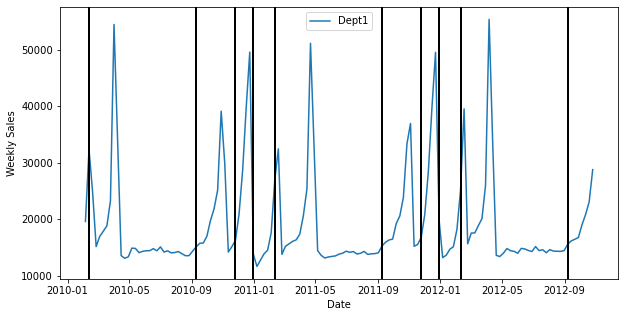

In [9]:
dept_num=1

fig,ax=plt.subplots(1,figsize=(10,5))
dat=sales[sales.Dept==dept_num].groupby(['Dept', 'Date']).mean()
ax.plot(dat.index.get_level_values(1),dat['Weekly_Sales'],label='Dept'+str(dept_num))
for x in sales['Date'].loc[(sales['Dept']==dept_num)&(sales['IsHoliday']==True)]:
    ax.axvline(x,color='k')
ax.set_xlabel('Date')
#ax.set_xticks([])
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

By plotting the mean weekly sales over all stores for different department numbers, we see that high weekly sales consistently correspond with holidays. It will therefore be important to account for holidays in our model.

[Min,Max] number of stores per department= [1, 45]


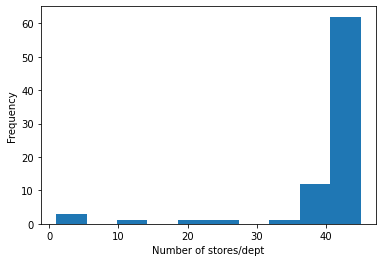

In [10]:
print('[Min,Max] number of stores per department=',[min(sales.groupby('Dept')['Store'].nunique()),max(sales.groupby('Dept')['Store'].nunique())])
plt.hist(sales.groupby('Dept')['Store'].nunique())
plt.ylabel('Frequency')
plt.xlabel('Number of stores/dept')
plt.show()

Beware! Some department only exist in as little as one store, althought most exist at over 40 of the 45 stores.

#### Markdown analysis

It's now time to figure out what the markdowns are. We know they're 'related to promotional markdowns'. Can we find out more?

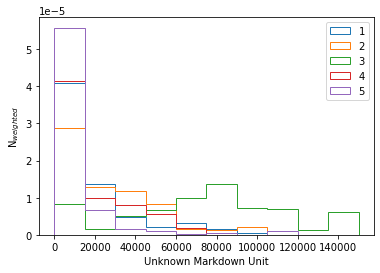

In [11]:
fig,ax=plt.subplots(1)

xmin=0
xmax=150000

ax.hist(features['MarkDown1'].dropna(),histtype='step',label='1',range=[xmin,xmax],density=True,weights=features['MarkDown1'].dropna())
ax.hist(features['MarkDown2'].dropna(),histtype='step',label='2',range=[xmin,xmax],density=True,weights=features['MarkDown2'].dropna())
ax.hist(features['MarkDown3'].dropna(),histtype='step',label='3',range=[xmin,xmax],density=True,weights=features['MarkDown3'].dropna())
ax.hist(features['MarkDown4'].dropna(),histtype='step',label='4',range=[xmin,xmax],density=True,weights=features['MarkDown4'].dropna())
ax.hist(features['MarkDown5'].dropna(),histtype='step',label='5',range=[xmin,xmax],density=True,weights=features['MarkDown5'].dropna())

#ax.set_xlim([0,4.e4])
#ax.set_ylim([0,4000])

ax.set_xlabel('Unknown Markdown Unit')
ax.set_ylabel('N$_{weighted}$')

ax.legend()

plt.show()

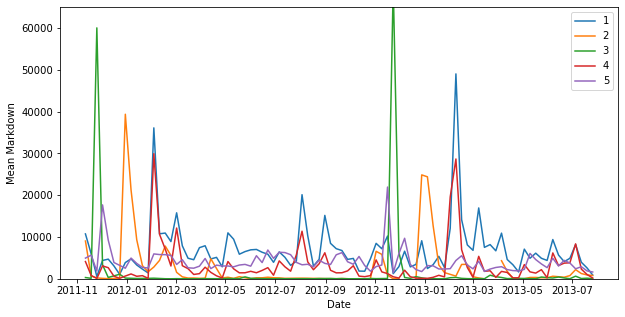

In [12]:
fig,ax=plt.subplots(1,figsize=(10,5))#,sharex=True)
ax.plot(features.groupby("Date").mean().index.get_level_values(0),features.groupby("Date").mean()['MarkDown1'],label='1')
ax.plot(features.groupby("Date").mean().index.get_level_values(0),features.groupby("Date").mean()['MarkDown2'],label='2')
ax.plot(features.groupby("Date").mean().index.get_level_values(0),features.groupby("Date").mean()['MarkDown3'],label='3')
ax.plot(features.groupby("Date").mean().index.get_level_values(0),features.groupby("Date").mean()['MarkDown4'],label='4')
ax.plot(features.groupby("Date").mean().index.get_level_values(0),features.groupby("Date").mean()['MarkDown5'],label='5')
ax.set_xlabel('Date')
ax.set_ylim([0,65000])
ax.set_ylabel('Mean Markdown')
plt.legend()
plt.show()

So all markdown variables, except Markdown 3, have a similar distribution where most of the value is contained within the range ~(0,60000). Markdown 3 seems to correlate almost exclusively with Christmas.

## Preparing for model input

For the first attempt at engineering a model, I will try training a regression model on data from the first year and testing it on data of the following year. My model will have ~11 feature inputs. 

The downside of not doing a time series analysis is that there will be no sense of time, i.e sales that occured in 2011 will have just as much weight as sales that occured in 2013 when trying to forecast sales in 2014. I expect that without taking time into account my model will perform poorly. However, since it's straightforward to compute let's try it.

#### Feature matrix preprocessing

We need to engineer one giant feature matrix by merging the dataframes

In [13]:
data=sales.merge(features,on=['Date','Store','IsHoliday'],how='outer')
data=data.merge(stores,on='Store')
print(data)

        Store  Dept       Date  Weekly_Sales IsHoliday  Temperature  \
0           1   1.0 2010-02-05      24924.50     False        42.31   
1           1   2.0 2010-02-05      50605.27     False        42.31   
2           1   3.0 2010-02-05      13740.12     False        42.31   
3           1   4.0 2010-02-05      39954.04     False        42.31   
4           1   5.0 2010-02-05      32229.38     False        42.31   
...       ...   ...        ...           ...       ...          ...   
423320     45   NaN 2013-06-28           NaN     False        76.05   
423321     45   NaN 2013-07-05           NaN     False        77.50   
423322     45   NaN 2013-07-12           NaN     False        79.37   
423323     45   NaN 2013-07-19           NaN     False        82.84   
423324     45   NaN 2013-07-26           NaN     False        76.06   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        

In [14]:
for col in data.columns:
    print(len(data[col][data[col].isnull()]))

0
1755
0
1755
0
0
0
270892
310793
284667
286859
270138
585
585
0
0


The number of NaN values in the MarkDowns has ballooned in the merge (the ratio of null to non-null remains the same). There are simply too many values to impute. For the time being we will ignore the MarkDowns.

In [15]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [16]:
data['IsHoliday']=data['IsHoliday'].astype(int) #Turn True/False into 1/0
data['Type'] = data['Type'].map({'A':1,'B':2,'C':3}) #Turn A,B,C into 1,2,3

#### Impute the missing values

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
simp = SimpleImputer()
df = simp.fit_transform(X=data[['Dept']]) 
data['Dept'] = df[:,0]
df = simp.fit_transform(X=data[['Weekly_Sales']]) 
data['Weekly_Sales'] = df[:,0]
df = simp.fit_transform(X=data[['CPI']]) 
data['CPI'] = df[:,0]
df = simp.fit_transform(X=data[['Unemployment']]) 
data['Unemployment'] = df[:,0]

#### Split into training and testing set by year

Since we know sales are much more dependent on dept than they are on store, let's just try modeling a single department and store. Say, Store 1, department 1.

In [18]:
X = data.loc[(data['Store']==1)&(data['Dept']==1)].drop(['Weekly_Sales'],axis=1)
y = data.loc[(data['Store']==1)&(data['Dept']==1)]['Weekly_Sales']

We will not be able to keep the 'Date' column in our model as a datetime type. However, to give a semblance of time, we will create 'Week','Month', and 'Year' columns to input instead

In [19]:
X["Month"] = X.Date.dt.month
X["Year"] = X.Date.dt.year
X["WeekofYear"] = X.Date.dt.weekofyear

Our model will be built to train on a single previous year of data and test on the following year. We split into single year increments to avoid seasonality as an initial test of the models.

In [20]:
end_traindate=pd.Timestamp(year=2011, month=10, day=26) 
end_testdate=pd.Timestamp(year=2012, month=10, day=26) #time series ends on this date so test on the previous year and train on any data before that

X_train = X.loc[X['Date']<end_traindate]
y_train = y.loc[X['Date']<end_traindate]

X_test = X.loc[(end_traindate<X['Date'])&(X['Date']<end_testdate)]
y_test = y.loc[(end_traindate<X['Date'])&(X['Date']<end_testdate)]

In [21]:
X_train_nd = X_train.drop(['Date'],axis=1)
X_test_nd = X_test.drop(['Date'],axis=1)

## Regression models

Let's try out a couple simple regression models: a linear regression and an xg boost regressor

In [22]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb

lin_reg = LinearRegression().fit(X_train_nd, y_train)
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_nd, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_lin_pred = lin_reg.predict(X_test_nd)
y_xgb_pred = xgb_reg.predict(X_test_nd)

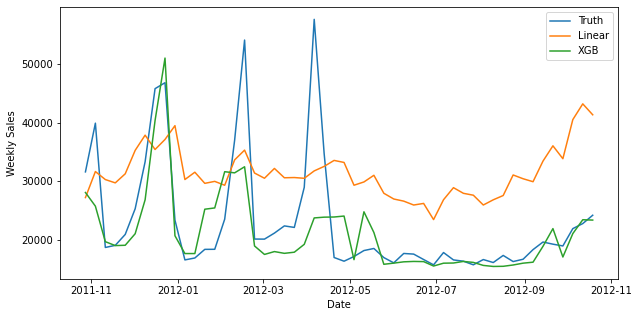

In [24]:
fig,ax = plt.subplots(1,figsize=(10,5))
ax.plot(X_test['Date'],y_test,label='Truth')
ax.plot(X_test['Date'],y_lin_pred,label='Linear')
ax.plot(X_test['Date'],y_xgb_pred,label='XGB')
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

Pretty good for not being a time series! However, there is still difficulty predicting the peaks. Also, we run into a fundamental problem here. The inputs and outputs of this model are contemporaneous. Thus is we want outputs for 2014, we need 2014 inputs, which we do not have. One option would be to forecast those inputs. In either scenario, we will need a time series.

## Time series analysis

### VAR

For this multivariate time analysis I will be using a Vector Auto Regression (VAR).

#### Check for stationarity

In [25]:
store_num = 1
dept_num = 1

idx_var=(data['Store']==store_num)&(data['Dept']==dept_num)


from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(y_train)

Test Statistic         -6.103351e+00
p-value                 9.715769e-08
# Lags                  1.000000e+00
# Observations          8.800000e+01
Critical Value (1%)    -3.506944e+00
Critical Value (5%)    -2.894990e+00
Critical Value (10%)   -2.584615e+00
dtype: float64
 Series is Stationary


Nice! Ready to feed our model

#### Training set creation

In [26]:
X_train_var=data.loc[(data['Store']==1)&(data['Dept']==1)&(data['Date']<end_traindate)] #Train on first year of data to avoid seasonality
X_train_var_nd=X_train_var.drop(['Date','Store','Dept','Type','Size'],axis=1)
X_train_var_nd.index = X_train_var.Date

In [27]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=X_train_var_nd)
model_fit = model.fit()

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [28]:
prediction = model_fit.forecast(model_fit.y, steps=20)

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [29]:
pred_var = pd.DataFrame(prediction, index=pd.date_range(start=end_traindate,periods=20,freq='W'), columns=X_train_var_nd.columns)

#def rebuild_diffed(series, first_element_original):
#    cumsum = series.cumsum()
#    return cumsum.fillna(0) + first_element_original

#Undo diff
#for col in train.columns:
#    pred[col] = rebuild_diffed(pred[col],var_data[col][0])

Let's see how we do on Store 1, Dept 1

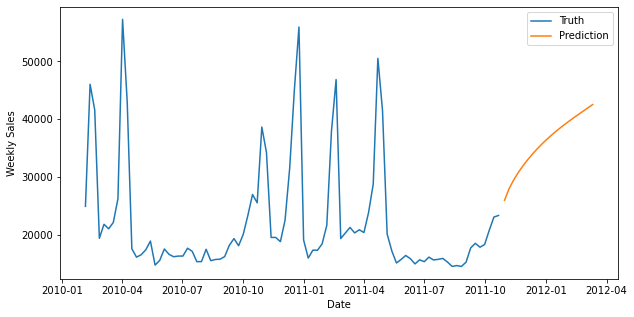

In [30]:
fig,ax = plt.subplots(1,figsize=(10,5))

ax.plot(data.loc[(data['Store']==1)&(data['Dept']==1)&(data['Date']<end_traindate)]['Date'],data.loc[(data['Store']==1)&(data['Dept']==1)&(data['Date']<end_traindate)]['Weekly_Sales'],label='Truth')
ax.plot(pd.date_range(start=end_traindate,periods=20,freq='W'),pred_var['Weekly_Sales'],label='Prediction')

ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')

plt.legend()
plt.show()

Answer: HORRIBLY. Time for SARIMA

### SARIMA

The first thing I will need to do is determine the optimal SARIMA parameters (ps and qs). To determine this I will borrow a bit of code from my colleague, CMK.

In [31]:
import itertools
from itertools import product
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog, parameters_list, d, D, s):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        endog - the observed variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(endog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 52

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

print(len(parameters_list))
print(parameters_list[:5])

256
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 1, 0)]


In [ ]:
best_params = optimize_SARIMA(y.values, parameters_list, 1, 1, 52)

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


This takes a very long time. Luckily, CMK has already done this step and ended up with order=(0,1,3), seasonal_order=(0,1,1,52)

In [32]:
best_model = SARIMAX(y.values, order=(0,1,3), seasonal_order=(0,1,1,52), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  143
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 52)   Log Likelihood                -919.318
Date:                              Mon, 22 Mar 2021   AIC                           1848.636
Time:                                      14:41:20   BIC                           1861.135
Sample:                                           0   HQIC                          1853.677
                                              - 143                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2175      0.087     -2.489      0.013      -0.389      -0.046
ma.L2         -0.50

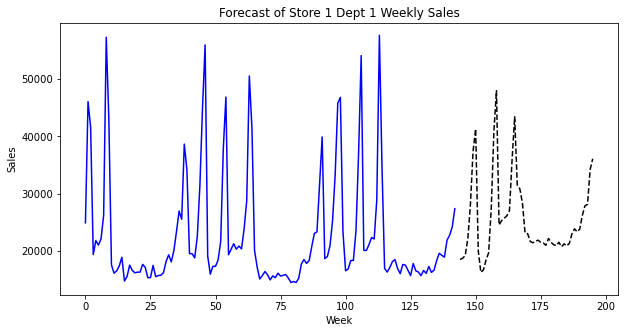

In [84]:
n_forecast = 52 #forecast the next year
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

fig, ax = plt.subplots(1,figsize=(10,5))
ax.plot(y.values, 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')

ax.set(title='Forecast of Store 1 Dept 1 Weekly Sales')
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
plt.show()

Looking pretty good! SARIMA could be one simple option for forecasting all of the departmentwide sales for each store. Let's quantify how well it does.

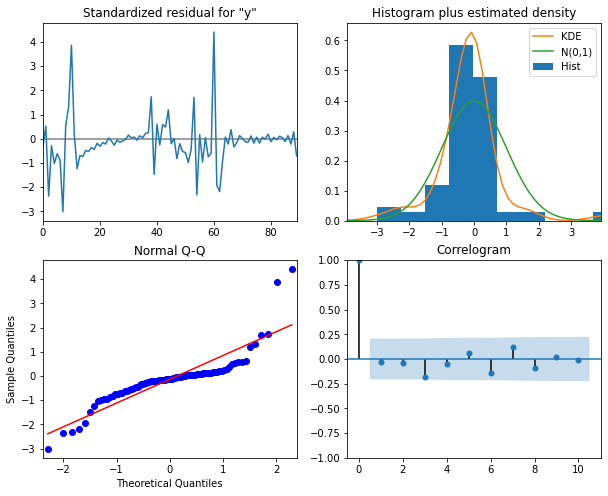

In [39]:
res.plot_diagnostics(figsize=(10, 8));

Residuals can be high around the 52 week mark, indicating the effect of seasonality. The residuals don't demonstrate correlation with each other which is a good sign. From the SARIMAX results table, we see that most parameters of this model result in low errors and good z-scores. The model could be better with a more thorough search of the parameter space.

## XGBoost Regressor + SARIMA

Let's return briefly to our regressors. Could we possibly combine SARIMA and the XGBregressor by using SARIMA to forecast the most important features for input into the XGBregressor?

In [42]:
feature_imps = xgb_reg.feature_importances_
feature_names = X_train_nd.columns

for i in range(len(feature_names)):
    print(feature_names[i],feature_imps[i])

Store 0.0
Dept 0.0
IsHoliday 0.09951932
Temperature 0.15918207
Fuel_Price 0.054496773
CPI 0.06656396
Unemployment 0.0007547333
Type 0.0
Size 0.0
Month 0.42188296
Year 0.0
WeekofYear 0.19760019


It's not surprising that the month and week of the year are so important. I will attempt to forecast Temperature, Fuel Price, and CPI with SARIMA. The other features will either be dropped (Unemployment) or duplicated (Month, Week, IsHoliday)

In [73]:
date_ext=pd.date_range(start=max(X['Date'])+dt.timedelta(days=7),periods=52,freq='W-FRI')
month_ext = date_ext.month
year_ext = date_ext.year
week_ext = date_ext.weekofyear

In [55]:
X['Date'][X['IsHoliday']==1]

73     2010-02-12
2218   2010-09-10
3014   2010-11-26
3372   2010-12-31
3800   2011-02-11
5940   2011-09-09
6731   2011-11-25
7096   2011-12-30
7527   2012-02-10
9667   2012-09-07
Name: Date, dtype: datetime64[ns]

I infer that the holidays are Valentine's Day, Labor Day, Thanksgiving, and Christmas

In [61]:
holidays = [pd.Timestamp(year=2013, month=2, day=14),pd.Timestamp(year=2013, month=9, day=2) , pd.Timestamp(year=2012, month=11, day=22),pd.Timestamp(year=2012, month=12, day=25)]

ishol_ext = np.zeros(52)
for i in holidays:
    datediff = date_ext-i
    holind = np.argmin(np.abs(datediff.days))
    ishol_ext[holind] = 1


#### Forecast temperature, fuel price, and CPI with SARIMA

We will use the same parameters as before since we expect these features to vary similarly with time

In [67]:
n_forecast=52

CPI_model = SARIMAX(X['CPI'].values, order=(0,1,3), seasonal_order=(0,1,1,52), simple_differencing=False)
CPI_res = CPI_model.fit(disp=False)
CPI_ext = CPI_res.get_prediction(end=CPI_model.nobs + n_forecast)
CPI_ext = CPI_ext.predicted_mean[-n_forecast:]
                      
Temp_model = SARIMAX(X['Temperature'].values, order=(0,1,3), seasonal_order=(0,1,1,52), simple_differencing=False)
Temp_res = Temp_model.fit(disp=False)
Temp_ext = Temp_res.get_prediction(end=Temp_model.nobs + n_forecast)
Temp_ext = Temp_ext.predicted_mean[-n_forecast:]
                      
FP_model = SARIMAX(X['Fuel_Price'].values, order=(0,1,3), seasonal_order=(0,1,1,52), simple_differencing=False)
FP_res = FP_model.fit(disp=False)
FP_ext = FP_res.get_prediction(end=FP_model.nobs + n_forecast)
FP_ext = FP_ext.predicted_mean[-n_forecast:]
                      

/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/lydiaelias/Library/Enthought/Canopy/edm/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


#### Drop the rest of the features

All of these (except Unemployment) are redundant because we are just focusing on Store 1, Dept 1.

In [68]:
X_new = X.drop(['Store','Dept','Unemployment','Type','Size'],axis=1)

In [74]:
X_ext = pd.DataFrame({X_new.columns[0]: date_ext, X_new.columns[1]: ishol_ext, X_new.columns[2]: Temp_ext, X_new.columns[3]: FP_ext, X_new.columns[4]: CPI_ext, X_new.columns[5]: month_ext, X_new.columns[6]: year_ext, X_new.columns[7]: week_ext})

#### Train the model

In [78]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_new.drop('Date',axis=1), y) #Train on selected features for entire time range originally given

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Final prediction

In [79]:
y_xgb_pred = xgb_reg.predict(X_ext.drop('Date',axis=1))

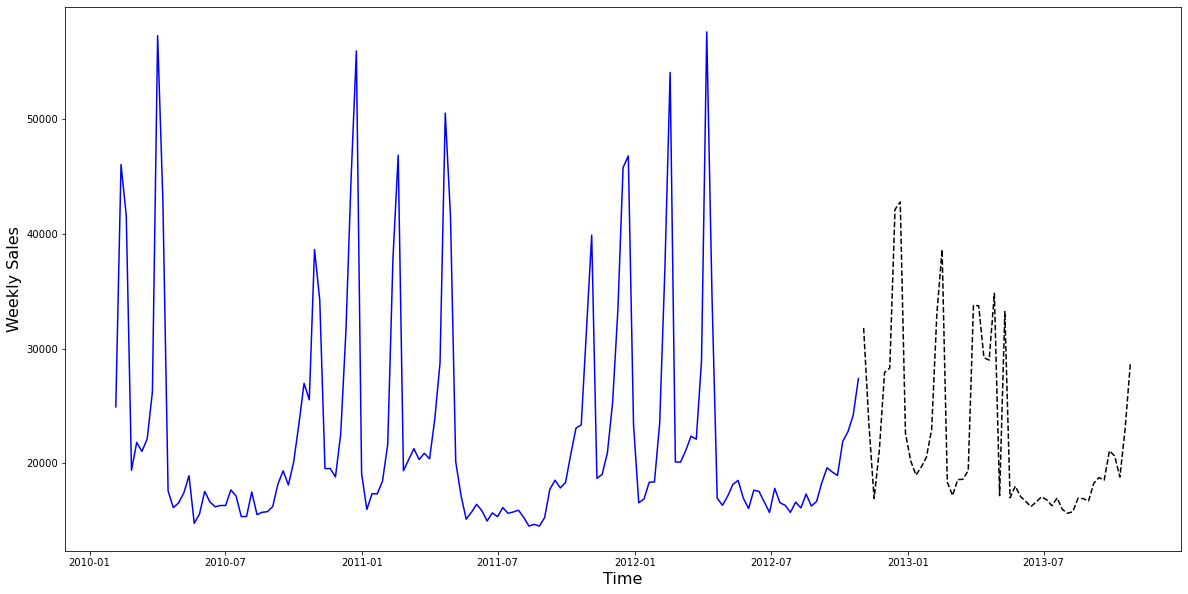

In [88]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax.plot(X['Date'],y,color='b')
ax.plot(X_ext['Date'],y_xgb_pred,color='k',linestyle='--')

ax.set_xlabel('Time',fontsize=16)
ax.set_ylabel('Weekly Sales',fontsize=16)

plt.show()

It's important to know that we didn't test this model (beyond what we saw when we originally used an XGBRegressor) so it is impossible to say at the moment whether it does better or worse than SARIMA alone. However, we can see that it 'looks good'. Clearly, the model is understanding the general yearly periodicity of the sales. 

## Conclusions

Given three datasets relating to retail sales in several stores and departments over a period of ~2.5 years, we were asked to predict the sales for each department in each store in the following year.

My first step in this task was to understand the data and the correlations within it. One of the main insights extracted from the data was that department was the main determinant of weekly sales. Holidays also seemed to play a strong role from first glance.

A model was needed to quantify these relations further. Preprocessing data for model input involved imputing missing values, splitting the 'Date' column into Week, Month, and Year columns, and in some cases deleting columns altogether. Because MarkDowns do not exist for every department at every time, I removed them from the feature inputs. This is an important shortcoming of my model; future analysis including MarkDown information may lead to more accurate predictions.

For simplicity, I limited my analysis to predicting sales of Dept 1 in Store 1. Many stores do not have Dept 1, and those that do do not have data with exactly matching time ranges. This limitation inherently assumes no correlation between departments and stores. Future analysis could be greatly improved by including multiple departments/stores into the model.

Finally, I predicted future sales using regression models, time series analyses, and a combination of both. The regression models suffered from a lack of sense of order. Although feature inputs included the month, year, and week of the year, the regression models, especially the linear regression model, were unable to reproduce the extreme maxima in the sales. Furthermore, in order to predict future sales, the regression model would need future feature inputs, which themselves need to be predicted.

I decided to try a different tack: time series analyses with VAR and SARIMA. VAR was unable to predict trends beyond a few weeks because it does not handle seasonality well. SARIMA, however, produced a the first reasonable prediction! With relatively low error, it was an excellent first approximation. However, SARIMA does not take into account any features besides the weekly sales (which inherently depends on other features given). I felt I could do better.

The final model I settled on was a combination of SARIMA and an XGB Regressor. I used SARIMA to predict future features (e.g Temperature, CPI, etc) in order to create a dataset of inputs that I could use to make my final prediction. The XGB Regressor was trained on all of the data given (for Store 1 Dept 1) except for Unemployment (which was found to have a low feature importance). Finally, it produced a prediction that 'looked reasonable' and took more information into account than SARIMA alone.

This is a work in progress! More work is needed to assess the XGB Regressor x SARIMA model (e.g testing it thoroughly) as well as to expand the analysis to include other departments, stores, and markdowns. More to come!